*****Descriptive Statistics and Data Visualisation Tool*****

Objective: Create a Python script that computes descriptive statistics for a given dataset and visualizes these statistics through various charts and graphs. 
The tool should help in understanding the distribution, central tendency, and variability of data.

Requirements:
- Use pandas, matplotlib and/or seaborn
- Compute basic stats (mean, median, mode, sd, quartiles)
- Create visualisations (hists, boxplots, scatterplots)
- Apply basic inferential stats (e.g. confidence intervals)

In [2]:
# Import relevant libraries and load in data
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

df = pd.read_csv(r"co2_emissions_kt_by_country.csv")

In [3]:
# Inspect the data
print(df.info())

print(df.head())

print(df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB
None
  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743
      country_code country_name  year         value
13948          ZWE     Zimbabwe  2015  12430.000305
13949          ZWE     Zimbabwe  2016  11020.000458
13950          ZWE     Zimbabwe  2017  10340.000153
13951          ZWE     Zimbabwe  2018  12380.000114
13952          ZWE     Zimbabwe  20

I only want to look at the most recent CO2 emissions by country

In [4]:
# Create filtered dataset on 2019 data
df_2019 = df[df['year'] == 2019]

print(df_2019.info())

print(df_2019.head())

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 116 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  239 non-null    object 
 1   country_name  239 non-null    object 
 2   year          239 non-null    int64  
 3   value         239 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.3+ KB
None
    country_code                 country_name  year          value
116          AFE  Africa Eastern and Southern  2019  603030.016154
176          AFG                  Afghanistan  2019    6079.999924
236          AFW   Africa Western and Central  2019  220740.000024
296          AGO                       Angola  2019   25209.999084
356          ALB                      Albania  2019    4829.999924


Data Cleaning and Preprocessing

In [5]:
print(df_2019.columns.unique())

print(df_2019['country_name'].unique())

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')
['Africa Eastern and Southern' 'Afghanistan' 'Africa Western and Central'
 'Angola' 'Albania' 'Andorra' 'Arab World' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan'
 'Botswana' 'Central African Republic' 'Canada'
 'Central Europe and the Baltics' 'Switzerland' 'Chile' 'China'
 "Cote d'Ivoire" 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia'
 'Comoros' 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba'
 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europe & Cent

Note that there are several regional and other groupings as well as country level categories:
- Africa Eastern and Southern
- Africa Western and Central
- Arab World
- Central Europe and the Baltics
- East Asia & Pacific (excluding high income)
- Europe & Central Asia
- Fragile and conflict affected situations
- Heavily indebted poor countries (HIPC)
- High income
- IBRD only
- IDA only
- IDA & IBRD total
- IDA total
- IDA blend
- Latin America & Caribbean (excluding high income)
- Least developed countries
- Low income
- Lower middle income 
- Low & middle income 
- Late demographic dividend
- Middle East & North Africa
- Middle East & North Africa (excluding high income)
- OECD members
- Other small states
- Pre-demographic dividend
- Pacific island small states
- Post-demographic dividend 
- Sub-saharan Africa (excluding high income)
- Sub-saharan Africa
- Small states
- East Asia & pacific (IDA and IBRD countries)
- Europe and Central Asia (IDA and IBRD countries)
- Latin America and the Caribbean (IDA and IBRD countries)
- Middle East and North Africa (IDA and IBRD countries)
- South Asia (IDA and IBRD)
- Sub-Saharan Africa (IDA and IBRD countries)

In [6]:
# Show table of 2019 data with code and country name
code_country_code = df_2019.groupby('country_code')['country_name'].sum()
display(code_country_code)

country_code
AFE    Africa Eastern and Southern
AFG                    Afghanistan
AFW     Africa Western and Central
AGO                         Angola
ALB                        Albania
                  ...             
WSM                          Samoa
YEM                    Yemen, Rep.
ZAF                   South Africa
ZMB                         Zambia
ZWE                       Zimbabwe
Name: country_name, Length: 239, dtype: object

In [7]:
# Save DataFrame to a CSV file to view
code_country_code.to_csv('code_country_code.csv')

# # Open the CSV file in a separate tab
# import webbrowser
# webbrowser.open('code_country_code.csv')


In [8]:
# Create a country only dataframe
df_2019_countries = df_2019[
    (df_2019['country_code'] != 'AFE') &
    (df_2019['country_code'] != 'AFW') &
    (df_2019['country_code'] != 'ARB') &
    (df_2019['country_code'] != 'CEB') &
    (df_2019['country_code'] != 'CSS') &
    (df_2019['country_code'] != 'EAP') &
    (df_2019['country_code'] != 'EAR') &
    (df_2019['country_code'] != 'EAS') &
    (df_2019['country_code'] != 'ECA') &
    (df_2019['country_code'] != 'ECS') &
    (df_2019['country_code'] != 'EMU') &
    (df_2019['country_code'] != 'EUU') &
    (df_2019['country_code'] != 'FCS') &
    (df_2019['country_code'] != 'HIC') &
    (df_2019['country_code'] != 'HPC') &
    (df_2019['country_code'] != 'IBRD') &
    (df_2019['country_code'] != 'IBT') &
    (df_2019['country_code'] != 'IBD') &
    (df_2019['country_code'] != 'IDA') &
    (df_2019['country_code'] != 'IDB') &
    (df_2019['country_code'] != 'IDX') &
    (df_2019['country_code'] != 'LAC') &
    (df_2019['country_code'] != 'LCN') &
    (df_2019['country_code'] != 'LDC') &
    (df_2019['country_code'] != 'LIC') &
    (df_2019['country_code'] != 'LMC') &
    (df_2019['country_code'] != 'LMY') &
    (df_2019['country_code'] != 'LTE') &
    (df_2019['country_code'] != 'MEA') &
    (df_2019['country_code'] != 'MIC') &
    (df_2019['country_code'] != 'MNA') &
    (df_2019['country_code'] != 'NAC') &
    (df_2019['country_code'] != 'OED') &
    (df_2019['country_code'] != 'OSS') &
    (df_2019['country_code'] != 'PRE') &
    (df_2019['country_code'] != 'PSS') &
    (df_2019['country_code'] != 'PST') &
    (df_2019['country_code'] != 'SSA') &
    (df_2019['country_code'] != 'SSF') &
    (df_2019['country_code'] != 'SST') &
    (df_2019['country_code'] != 'TEA') &
    (df_2019['country_code'] != 'TEC') &
    (df_2019['country_code'] != 'TLA') &
    (df_2019['country_code'] != 'TMN') &
    (df_2019['country_code'] != 'TSA') &
    (df_2019['country_code'] != 'TSS') &
    (df_2019['country_code'] != 'UMC') &
    (df_2019['country_code'] != 'WLD')
]

display(df_2019_countries.head())

display(df_2019_countries['country_name'].unique())
display(len(df_2019_countries['country_name']))

,country_code,country_name,year,value
176,AFG,Afghanistan,2019,6079.999924
296,AGO,Angola,2019,25209.999084
356,ALB,Albania,2019,4829.999924
386,AND,Andorra,2019,500.000000
506,ARE,United Arab Emirates,2019,188860.000610


array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia, The',
       'Guinea-Bissau'

192

Key statistics:

In [9]:
# Find the mean CO2 emissions across all countries

average_CO2_emissions = df_2019_countries['value'].mean()
display(f"The average CO2 emissions for 2019 across all countries in this dataset is {round(average_CO2_emissions,2)} kilotons")

'The average CO2 emissions for 2019 across all countries in this dataset is 190969.22 kilotons'

In [10]:
# Find the country with the largest CO2 emissions in 2019

CO2_emissions_sorted = df_2019_countries.sort_values(by='value', ascending=False)
display(CO2_emissions_sorted.head())
display(CO2_emissions_sorted.tail())

display(CO2_emissions_sorted.info())

highest_CO2_emissions = CO2_emissions_sorted.iloc[0]
smallest_CO2_emissions = CO2_emissions_sorted.iloc[191]

print(f"The country with the highest CO2 emissions in 2019 was {highest_CO2_emissions['country_name']}.\n{highest_CO2_emissions['country_name']} had {round(highest_CO2_emissions['value'],2)} kilotons of CO2 emissions.\n")
print(f"The country with the lowest CO2 emissions in 2019 was {smallest_CO2_emissions['country_name']}.\n{smallest_CO2_emissions['country_name']} had {round(smallest_CO2_emissions['value'],2)} kilotons of CO2 emissions.")

,country_code,country_name,year,value
2159,CHN,China,2019,1.070722e+07
13268,USA,United States,2019,4.817720e+06
10873,SAS,South Asia,2019,2.784080e+06
5869,IND,India,2019,2.456300e+06
10753,RUS,Russian Federation,2019,1.703590e+06


,country_code,country_name,year,value
7398,LIE,Liechtenstein,2019,150.000006
11653,STP,Sao Tome and Principe,2019,150.000006
6648,KIR,Kiribati,2019,90.000004
9473,NRU,Nauru,2019,59.999999
12938,TUV,Tuvalu,2019,10.000000


<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 2159 to 12938
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  192 non-null    object 
 1   country_name  192 non-null    object 
 2   year          192 non-null    int64  
 3   value         192 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.5+ KB


None

The country with the highest CO2 emissions in 2019 was China.
China had 10707219.73 kilotons of CO2 emissions.

The country with the lowest CO2 emissions in 2019 was Tuvalu.
Tuvalu had 10.0 kilotons of CO2 emissions.


In [11]:
# What does the distribution look like for the data? What is the standard deviation from the mean?

standard_deviation = np.std(df_2019_countries['value'])
print(f"The standard deviation for the CO2 emissions in the 2019 country dataset is {round(standard_deviation, 2)}.\nThis indicates a large variation in data across countries.")


The standard deviation for the CO2 emissions in the 2019 country dataset is 892755.94.
This indicates a large variation in data across countries.


Look at the 20 countries with the highest CO2 emissions in 2019

In [12]:
# filter data by top 20 countries

df_2019_countries_top20 = CO2_emissions_sorted.iloc[0:20]

print(df_2019_countries_top20)

      country_code        country_name  year         value
2159           CHN               China  2019  1.070722e+07
13268          USA       United States  2019  4.817720e+06
10873          SAS          South Asia  2019  2.784080e+06
5869           IND               India  2019  2.456300e+06
10753          RUS  Russian Federation  2019  1.703590e+06
6409           JPN               Japan  2019  1.081570e+06
2941           DEU             Germany  2019  6.574000e+05
5989           IRN  Iran, Islamic Rep.  2019  6.300100e+05
5749           IDN           Indonesia  2019  6.198400e+05
6768           KOR         Korea, Rep.  2019  6.107900e+05
1919           CAN              Canada  2019  5.802100e+05
10933          SAU        Saudi Arabia  2019  5.237800e+05
8164           MEX              Mexico  2019  4.492700e+05
13840          ZAF        South Africa  2019  4.396400e+05
1581           BRA              Brazil  2019  4.343000e+05
12908          TUR             Turkiye  2019  3.968400e+

Text(0.5, 1.0, 'CO2 emissions by country in 2019')

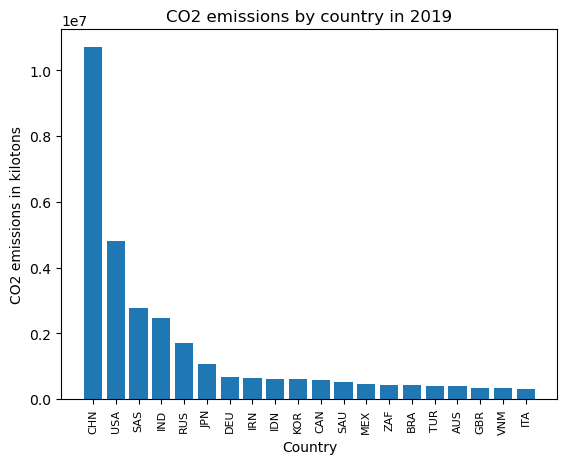

In [13]:
# Show bar chart of the top 20 CO2 emitting countries

plt.bar(df_2019_countries_top20['country_code'], df_2019_countries_top20['value'])
plt.xlabel("Country")
plt.ylabel("CO2 emissions in kilotons")
plt.xticks(rotation=90, fontsize=8)
plt.title("CO2 emissions by country in 2019")

#China had the highest CO2 emissions in 2019


Spotlight on China and the Region

     country_code country_name  year       value
2100          CHN        China  1960  780726.302
2101          CHN        China  1961  552066.850
2102          CHN        China  1962  440359.029
2103          CHN        China  1963  436695.696
2104          CHN        China  1964  436923.050


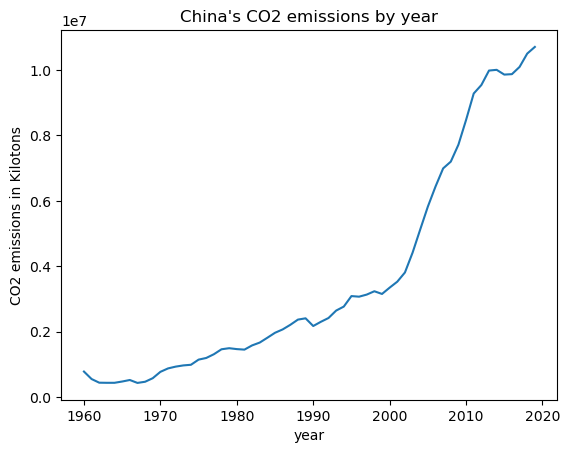

3346530.0
10707219.7265625


In [14]:
# See how China's CO2 emissions changed over time

china_CO2emissions = df[df['country_code'] == 'CHN']
print(china_CO2emissions.head())

# Create a plot
plt.plot(china_CO2emissions['year'], china_CO2emissions['value'])
plt.xlabel('year')
plt.ylabel('CO2 emissions in Kilotons')
plt.title("China's CO2 emissions by year")
plt.show()

# The line graph shows that China's CO2 emissions have increased dramatically since the year 2000.

china_CO2emissions_2000 = china_CO2emissions.loc[china_CO2emissions['year'] == 2000, 'value'].values[0]
print(china_CO2emissions_2000)

china_CO2emissions_2019 = china_CO2emissions.loc[china_CO2emissions['year'] == 2019, 'value'].values[0]
print(china_CO2emissions_2019)

# In the year 2000, China's CO2 emissions were 3,346,530 kilotons, which rose to 10,707,220 in 2019.

In [15]:
# Let's look at how China compares to the average of other countries in the region: Taiwan, Japan, South Korea, HK, North Korea, Mongolia and Macao

#JPN, KOR, PRK, HKG, MNG, MAC - taiwan not in dataset

# Define the list of country codes
east_asian_countries_list = ['JPN', 'KOR', 'PRK', 'HKG', 'MNG', 'MAC', 'CHN']

# Filter the dataset
east_asian_countries = df[df['country_code'].isin(east_asian_countries_list)]

print(east_asian_countries.info())

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 2100 to 10249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  414 non-null    object 
 1   country_name  414 non-null    object 
 2   year          414 non-null    int64  
 3   value         414 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.2+ KB
None


<Figure size 800x500 with 0 Axes>

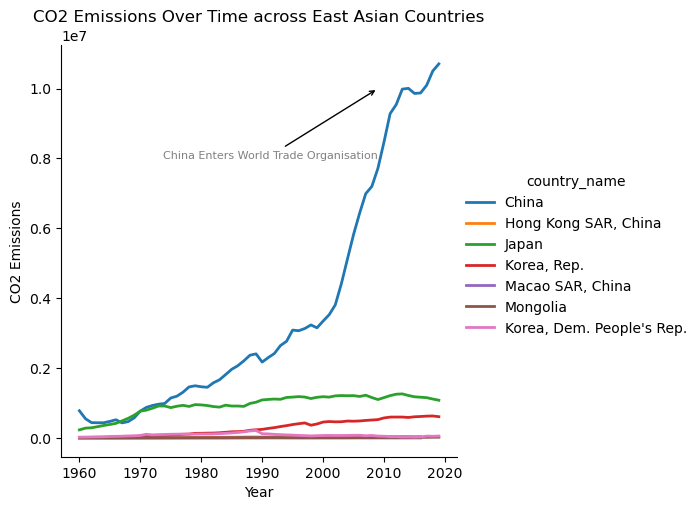

In [35]:
# Create line plot
labels = ["China", "Hong Kong", "Japan", "South Korea", "Macao", "Mongolia", "North Korea"]

plt.figure(figsize=(8,5))
fig = sns.relplot(
    data=east_asian_countries, 
    x='year', 
    y='value', 
    hue='country_name', 
    
    kind='line', 
    markers = 'o',
    linewidth=2
    )
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Over Time across East Asian Countries')
# plt.legend(title='Country', labels=labels)


plt.annotate(
    'China Enters World Trade Organisation',
    xy=(2009, 1e7),
    xytext=(2009, 0.8e7),
    arrowprops=dict(facecolor='grey', arrowstyle='->'),
    fontsize=8,
    color='grey',
    horizontalalignment='right'
    )

plt.show()

In [17]:
# Lets look at different regions now
regional_list = ['AFE', 'AFW', 'CEB', 'EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'OED', 'SSF']

# Filter the dataset
regions = df[df['country_code'].isin(regional_list)]
print(regions.head())
regions_2019 = regions[regions['year'] == 2019]



   country_code                 country_name  year          value
57          AFE  Africa Eastern and Southern  1960  118545.901306
58          AFE  Africa Eastern and Southern  1961  123758.903330
59          AFE  Africa Eastern and Southern  1962  128093.897815
60          AFE  Africa Eastern and Southern  1963  132810.332530
61          AFE  Africa Eastern and Southern  1964  144345.352398


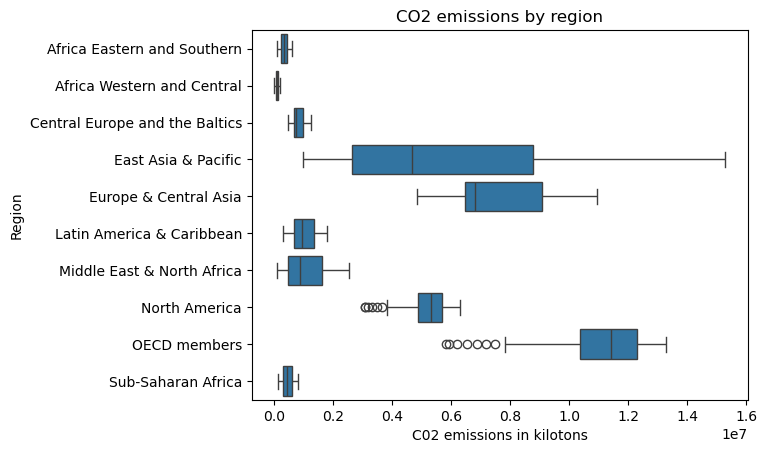

<Figure size 640x480 with 0 Axes>

In [18]:
# Show in set of boxplots

sns.boxplot(data= regions, y=regions['country_name'], x=regions['value'])
plt.title('CO2 emissions by region')
plt.xlabel('C02 emissions in kilotons')
plt.ylabel('Region')
plt.show()
plt.clf()

# The boxplot below shows the CO2 emissions for each region as well as OECD members between 1964 and 2019. The greatest difference can be seen for East Asia and the Pacific, which has a much larger variation than any of the other regions.

Look at the top players

In [19]:
# Filter by top CO2 emitting countries in 2019:  China, USA, India, Russia, Japan

worst_countries = ['China', 'United States', 'India', 'Russian Federation', 'Japan']

df_worst_countries = df[df['country_name'].isin(worst_countries)]
print(df_worst_countries.sample(5))

      country_code        country_name  year         value
6392           JPN               Japan  2002  1.206600e+06
13224          USA       United States  1975  4.406330e+06
10728          RUS  Russian Federation  1994  1.685050e+06
13254          USA       United States  2005  5.753490e+06
6388           JPN               Japan  1998  1.130310e+06


check why legends not adding up

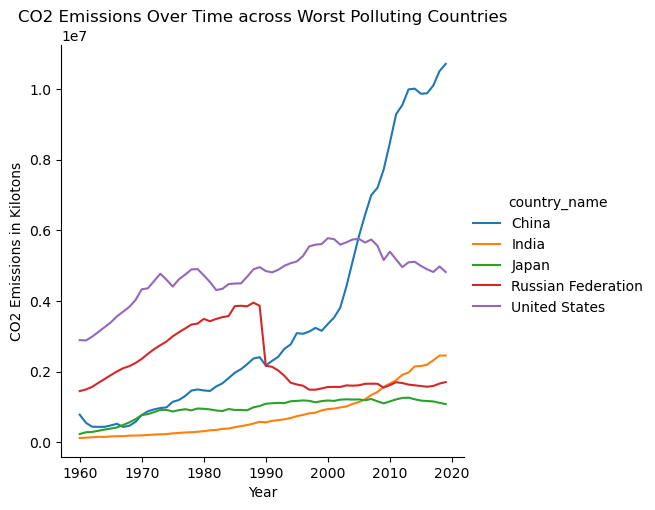

In [33]:
# Create line plot
labels = ['China', 'United States', 'India', 'Russian Federation', 'Japan']

# Define the color palette
# palette = sns.color_palette("tab10")

fig = sns.relplot(
    data=df_worst_countries, 
    x='year', 
    y='value', 
    hue='country_name',
    kind='line',
    legend='brief',
    # palette=palette
    )
plt.xlabel('Year')
plt.ylabel('CO2 Emissions in Kilotons')
plt.title('CO2 Emissions Over Time across Worst Polluting Countries')
# handles, _ = fig.get_legend_handles_labels()


plt.show()